 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [89]:
# Initial imports, for liberies that are going to be used for this assignment

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [90]:
#Here I am defining the path in which the data is stored

whale_path = Path("Resources/whale_returns.csv")

In [91]:
#The data is being read in, and is setting the "Date" column as the index, also it is coverting the data in the date column to follow a structured date format.
whale_data = pd.read_csv(whale_path, parse_dates=True,index_col="Date", infer_datetime_format=True)

In [92]:
# Reading whale returns
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [93]:
# Counting the number of nulls in our data file to see if data cleaning is requried
# will need to remove empty cells

whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [94]:
# Here we are droping the nulls from the data, and storing it as a new copy.
whale_data = whale_data.dropna().copy()
whale_data.isnull().sum()
Whale_data = whale_data.sort_values("Date",ascending=True)
Whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [95]:
# Here we are defining the path again where we will grab out data, and setting the date column as the index column.

algo_path = Path("Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_path,parse_dates=True,index_col="Date", infer_datetime_format=True)

#Reading algorithmic returns
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [96]:
# Counting the number of nulls in our data file to see if data cleaning is requried
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [97]:
# Here we are droping the nulls from the data, and storing it as a new copy.
algo_data = algo_data.dropna().copy()
algo_data.isnull().sum()
algo_data = algo_data.sort_values("Date",ascending=True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [98]:
# Reading S&P TSX 60 Closing Prices
# Here we are defining the path again where we will grab out data, and setting the date column as the index column.
sptsx60_path = Path("Resources/sp_tsx_history.csv")
sptsx60_data = pd.read_csv(sptsx60_path,parse_dates=True,index_col="Date", infer_datetime_format=True)
sptsx60_data.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [99]:
# We are checking the data types, to see if the data is sotred as a float, in order to run our calculations.

sptsx60_data["Close"].dtype

dtype('O')

In [100]:
# Here we are coverting the closing prices to a float data type 
# Fix Data Types
sptsx60_data["Close"] = sptsx60_data["Close"].str.replace("$", "")
sptsx60_data.head()
sptsx60_data["Close"] = sptsx60_data["Close"].str.replace(",", "")
sptsx60_data["Close"] = sptsx60_data["Close"].astype('float')
sptsx60_data["Close"].dtype

dtype('float64')

In [101]:
# we are going to calculate daily returns of the portfolio

sptsx60_returns = sptsx60_data.pct_change()
sptsx60_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [102]:
# Droping nulls from the first row since, there is no percent return
sptsx60_returns = sptsx60_returns.dropna().copy()
sptsx60_returns.isnull().sum()
sptsx60_returns = sptsx60_returns.sort_values("Date",ascending=True)
sptsx60_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [103]:
# Here we are renaming the `Close` Column to be specific to the S&P TSX index
sptsx60_returns = sptsx60_returns.rename(columns={
    "Close":"S&P TSX"
}).copy()
sptsx60_returns.head()



,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [104]:
# We Joined Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

all_returns = pd.concat([whale_data, algo_data, sptsx60_returns],axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

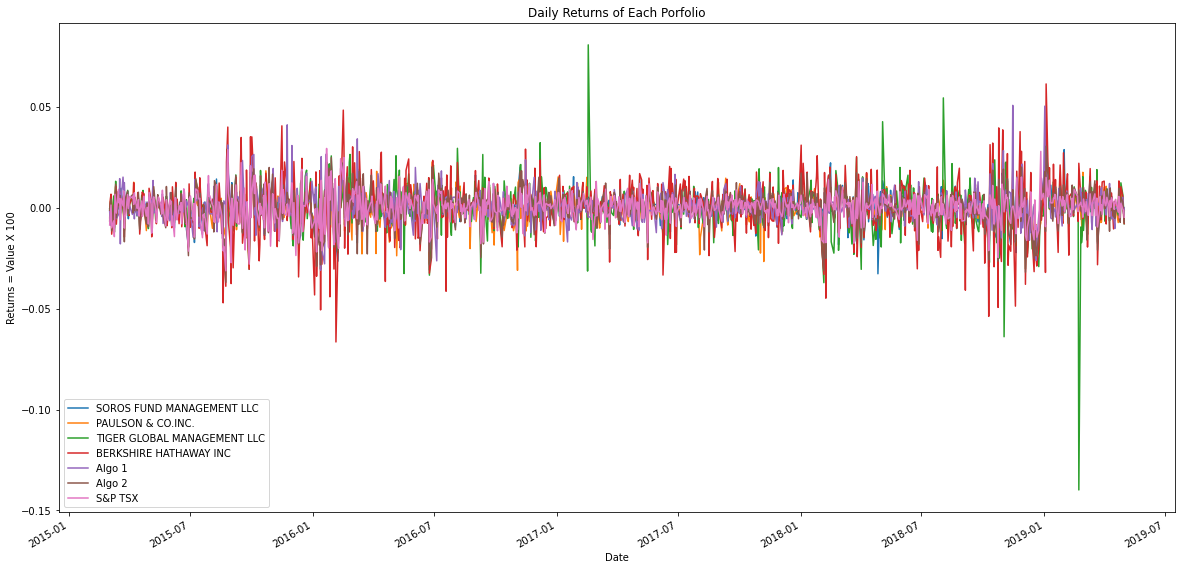

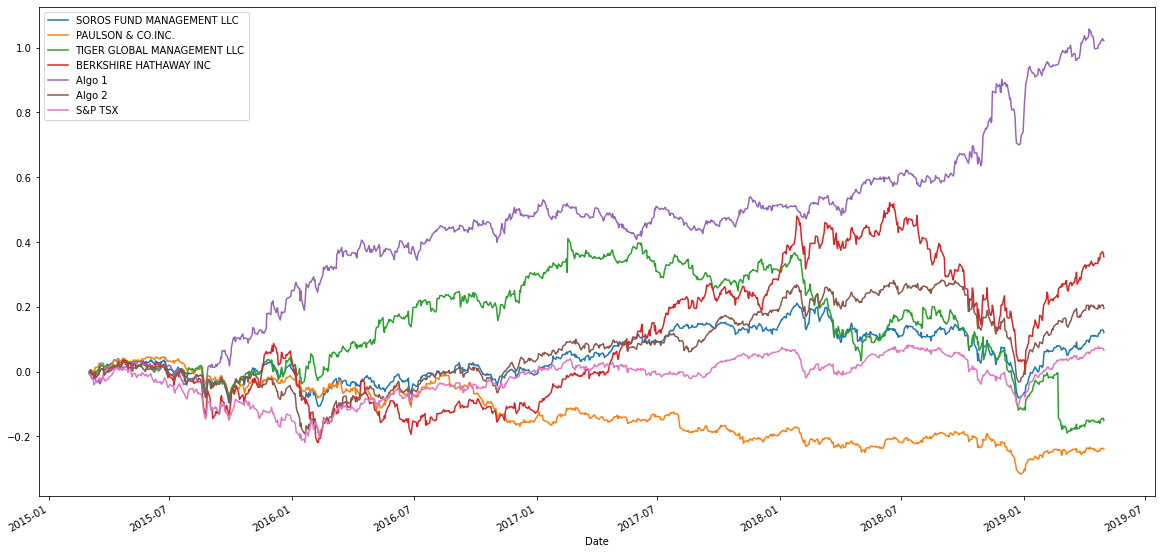

In [105]:
# Here we are ploting daily returns of all the portfolios

a = all_returns.plot(figsize=(20,10),title="Daily Returns of Each Porfolio", ylabel="Returns = Value X 100")

# Ploting the cumulative returns of each portfolio.

all_returns_cumulative = (1 + all_returns).cumprod()-1
all_returns_cumulative.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

Algo 1 has a cumulative return of 102.19%
BERKSHIRE HATHAWAY INC. has a cumulative return of 35.44%
Algo 2 has a cumulative return of 19.53%
SOROS FUND MANAGEMENT LLC has a cumulative return of 12.06%
S&P TSX 60 has a cumulative return of 6.58%
TIGER GLOBAL MANAGMENT LLC has a cumulative return of -15.1%
PAULSON & CO.INC. has a cumulative return of -23.89%


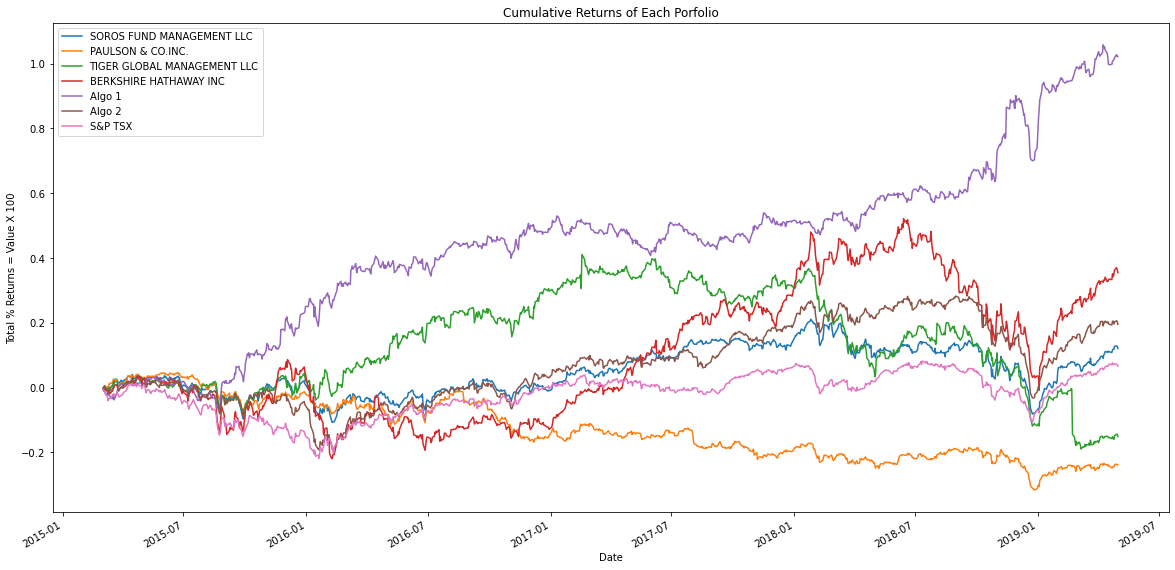

In [106]:
# Calculating the cumulative returns of each portfolio
returns_soros = all_returns.iloc[:,0]
returns_paulson = all_returns.iloc[:,1]
returns_tiger = all_returns.iloc[:,2]
returns_berk = all_returns.iloc[:,3]
returns_algo1 = all_returns.iloc[:,4]
returns_algo2 = all_returns.iloc[:,5]
returns_sptsx = all_returns.iloc[:,6]

cumulative_soros=(1+returns_soros).cumprod()-1
cumulative_paulson=(1+returns_paulson).cumprod()-1
cumulative_tiger=(1+returns_tiger).cumprod()-1
cumulative_berk=(1+returns_berk).cumprod()-1
cumulative_algo1=(1+returns_algo1).cumprod()-1
cumulative_algo2=(1+returns_algo2).cumprod()-1
cumulative_sptsx=(1+returns_sptsx).cumprod()-1


# Plot each portfolio's cumulative returns

ax = cumulative_soros.plot(figsize=(20,10), title="Cumulative Returns of Each Porfolio",ylabel="Total % Returns = Value X 100")
cumulative_paulson.plot (ax=ax)
cumulative_tiger.plot(ax=ax)
cumulative_berk.plot(ax=ax)
cumulative_algo1.plot(ax=ax)
cumulative_algo2.plot(ax=ax)
cumulative_sptsx.plot(ax=ax)

ax.legend()

print(f"Algo 1 has a cumulative return of {round(((cumulative_algo1.iloc[[-1][-1]])*100),2)}%")
print(f"BERKSHIRE HATHAWAY INC. has a cumulative return of {round(((cumulative_berk.iloc[[-1][-1]])*100),2)}%")
print(f"Algo 2 has a cumulative return of {round(((cumulative_algo2.iloc[[-1][-1]])*100),2)}%")
print(f"SOROS FUND MANAGEMENT LLC has a cumulative return of {round(((cumulative_soros.iloc[[-1][-1]])*100),2)}%")
print(f"S&P TSX 60 has a cumulative return of {round(((cumulative_sptsx.iloc[[-1][-1]])*100),2)}%")
print(f"TIGER GLOBAL MANAGMENT LLC has a cumulative return of {round(((cumulative_tiger.iloc[[-1][-1]])*100),2)}%")
print(f"PAULSON & CO.INC. has a cumulative return of {round(((cumulative_paulson.iloc[[-1][-1]])*100),2)}%")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Spread of Returns For Each Porfolio'}>

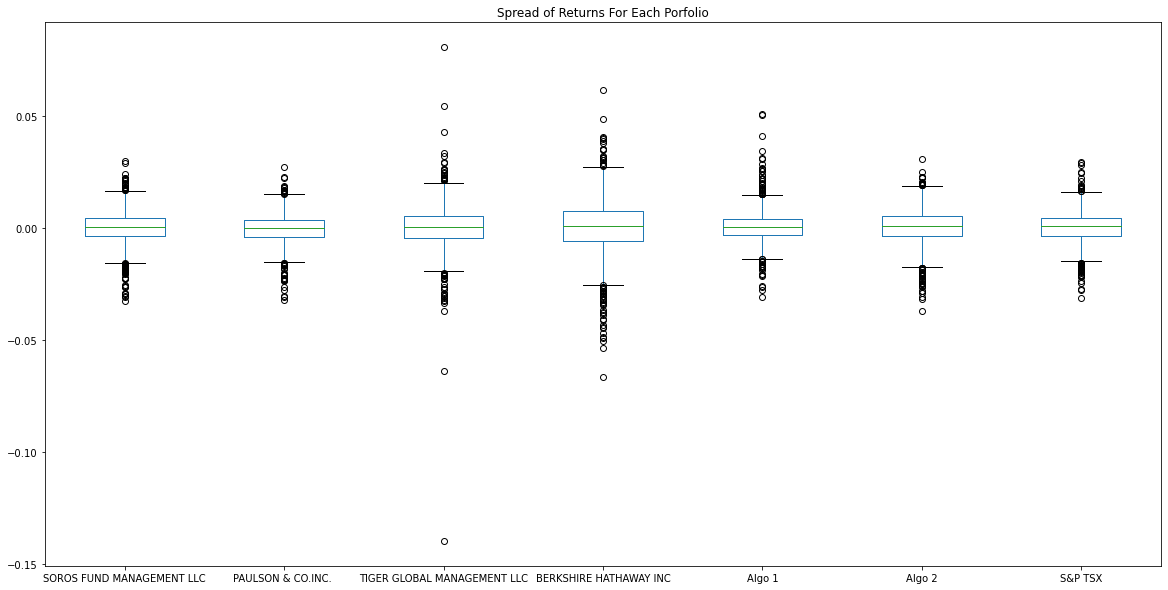

In [107]:
# Box plot to visually show risk of each portfolio

all_returns.plot.box(figsize=(20,10),title="Spread of Returns For Each Porfolio")

### Calculate Standard Deviations

In [108]:
# To calculate the daily returns standard deviations for all the portfolios
daily_std = all_returns.std()
daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [109]:
# Calculate the daily standard deviation of S&P TSX 60
# we are also sorting the standard deviations from high to low to see a better representation of our results

daily_std = daily_std.sort_values(ascending=False)
daily_std.head(7)

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Calculate the Annualized Standard Deviation

In [110]:
# we are calculating the annualized standard deviation for each porfolio (252 trading days)

annualized_std = daily_std*np.sqrt(252)
annualized_std.head(7)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

#### Determine which portfolios are riskier than the S&P TSX 60?

##### Response :

There are 5 porfolios that are riskier than the S&P TSX 60 when looking at both the daily standard deviation as well as the annualized standard deviation.From the most risky to the least, they are Berkshire Hathaway INC, Tiger Global Global Management LLC, Algo 2, Soros Fund Management LLC, and the Algo 1 porfolio. The only one that shows to be less risky than the S&P TSX 60 is the Paulson & CO.INC. portfolio.

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-days Standard Deviation'}, xlabel='Date', ylabel='Standard Deviation'>

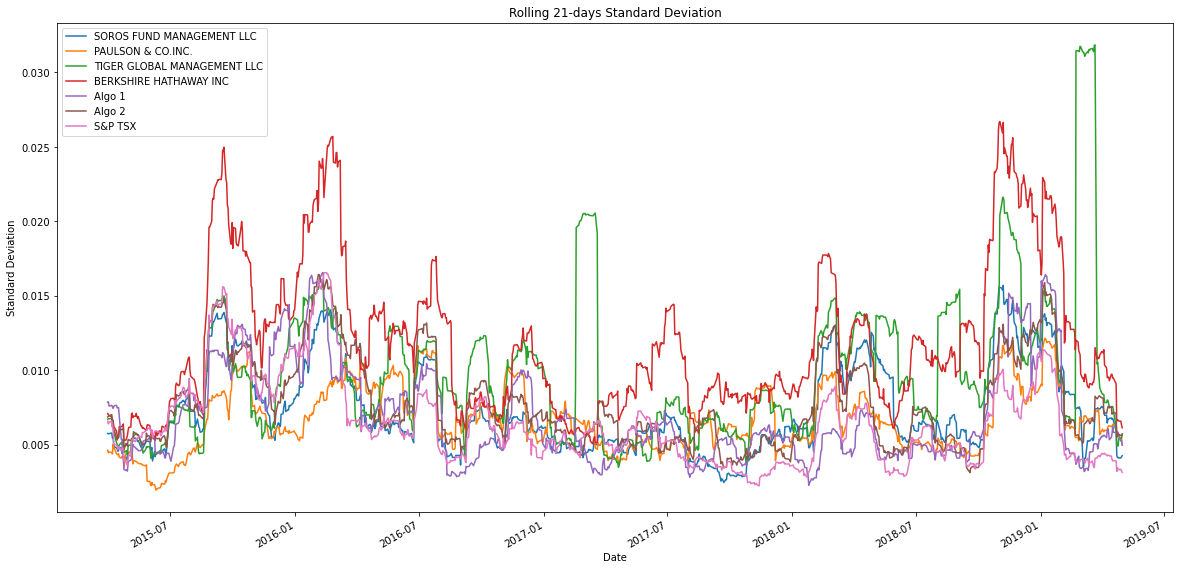

In [111]:
# we are calculating the rolling standard deviation for all portfolios using a 21-day window
# Ploting the rolling standard deviation as well

all_returns.rolling(window=21).std().plot(figsize=(20,10),title="Rolling 21-days Standard Deviation",ylabel="Standard Deviation")

### Calculate and plot the correlation

In [112]:
# Calculating the correlation between each porfolio

correlation = all_returns.corr()

# Displaying the correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta'}, xlabel='Date', ylabel='Beta'>

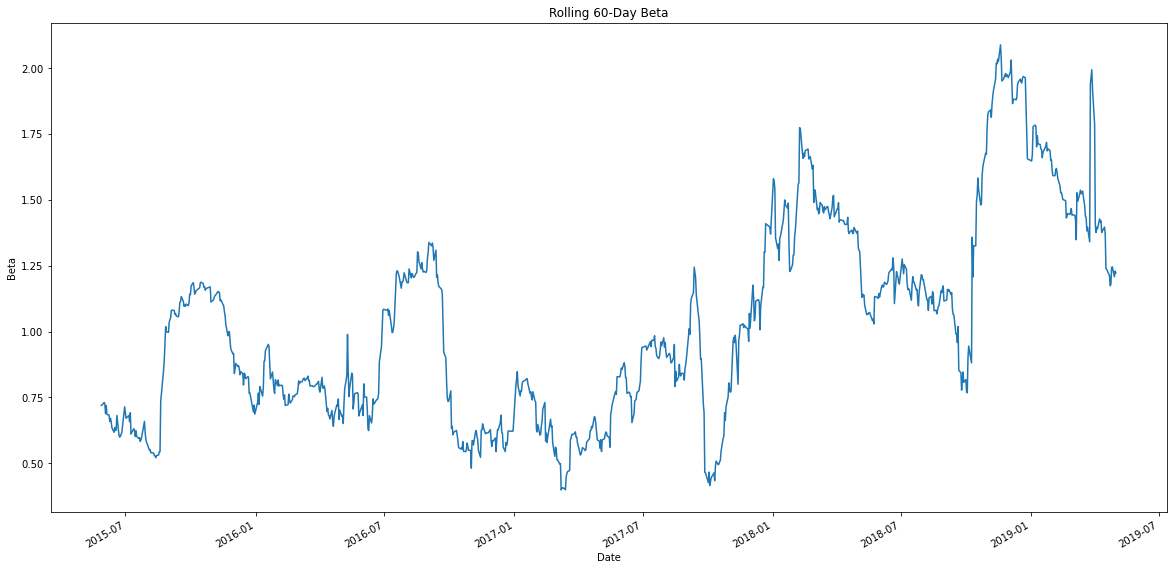

In [113]:
# Here we are calculating covariance of the Bershire Hathaway portfolio
rolling_berkshire_covariance = all_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(all_returns["S&P TSX"])

# Calculating the variance of S&P TSX portfolio
rolling_sptsx_variance = all_returns["S&P TSX"].rolling(window=60).var()

# Computing the beta of the Bershire Hathaway portfolio
rolling_berkshire_beta = rolling_berkshire_covariance / rolling_sptsx_variance


# Plotting the beta trend with a 60-day window
rolling_berkshire_beta.plot(figsize=(20,10),title="Rolling 60-Day Beta",ylabel="Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average of Daily Returns'}, xlabel='Date'>

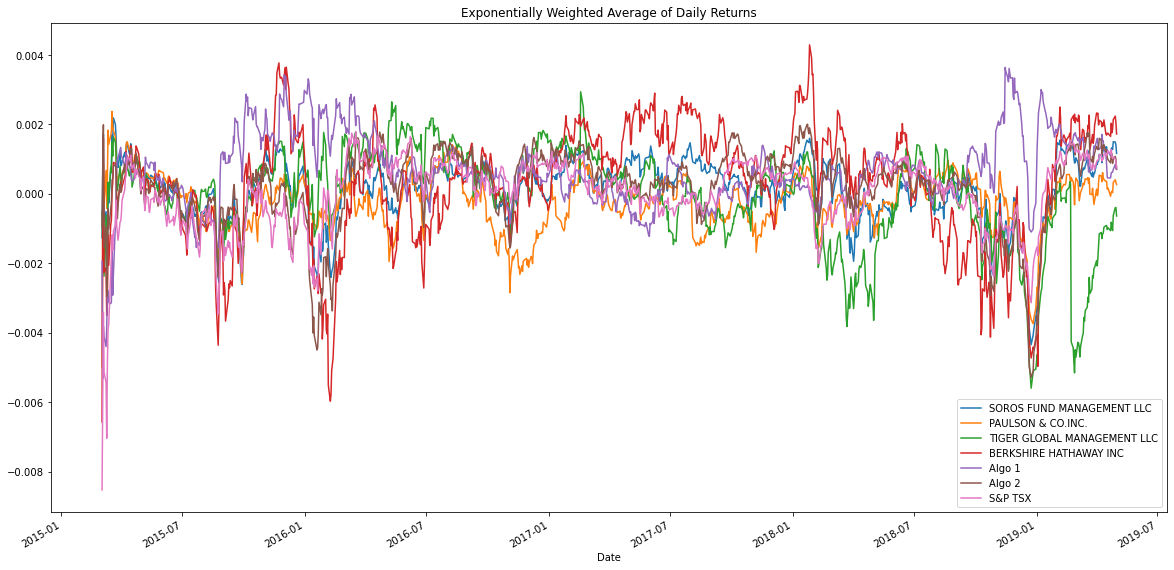

In [114]:
# Use `ewm` to calculate the rolling window

all_returns_EWA = all_returns.ewm(halflife=21,min_periods=0,adjust=True,ignore_na=False).mean()
all_returns_EWA.plot(figsize=(20,10), title="Exponentially Weighted Average of Daily Returns")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [115]:
# Calculating the Annualized Sharpe Ratios
# Assuming the Risk free rate is 0
sharpe_ratios = (all_returns.mean()* 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios for Portfolios'}, xlabel='Porfolio', ylabel='Sharpe Ratio'>

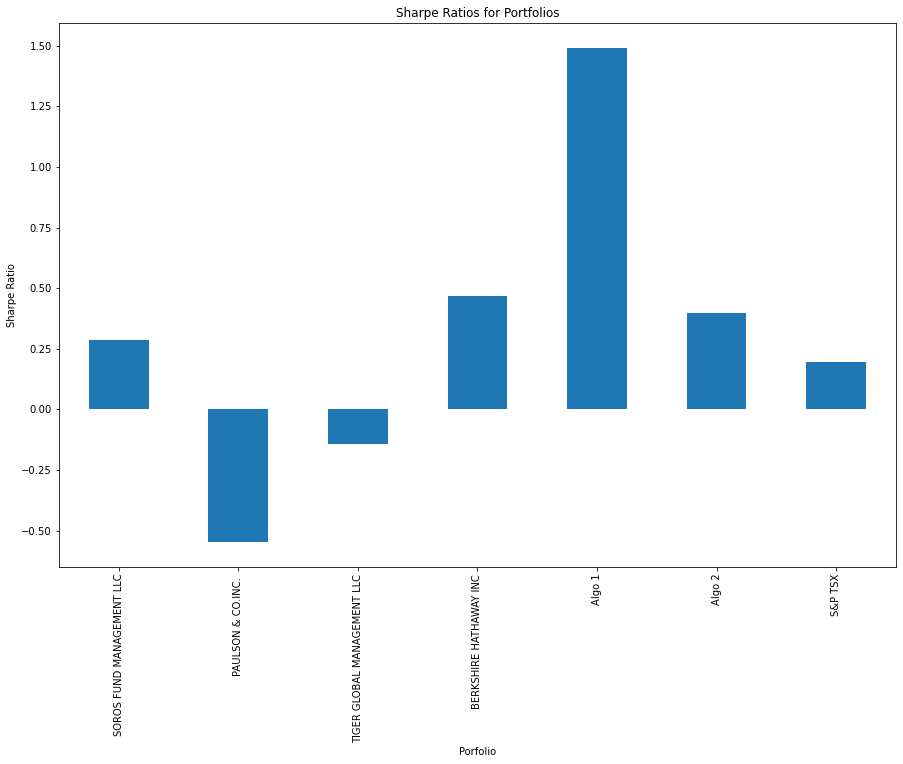

In [116]:
# Visualizing the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(15,10),title="Sharpe Ratios for Portfolios",xlabel="Porfolio", ylabel="Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Out of all the portfolios, Algo 1 performed the best of them all with a cumulative return of 102.19% over the period analyzed.

In [117]:

print('_____________________________________________________________________________________')
print()
print(f"Algo 1 has a cumulative return of {round(((cumulative_algo1.iloc[[-1][-1]])*100),2)}%")
print()
print(f"BERKSHIRE HATHAWAY INC. has a cumulative return of {round(((cumulative_berk.iloc[[-1][-1]])*100),2)}%")
print()
print(f"Algo 2 has a cumulative return of {round(((cumulative_algo2.iloc[[-1][-1]])*100),2)}%")
print()
print(f"SOROS FUND MANAGEMENT LLC has a cumulative return of {round(((cumulative_soros.iloc[[-1][-1]])*100),2)}%")
print()
print(f"S&P TSX 60 has a cumulative return of {round(((cumulative_sptsx.iloc[[-1][-1]])*100),2)}%")
print()
print(f"TIGER GLOBAL MANAGMENT LLC has a cumulative return of {round(((cumulative_tiger.iloc[[-1][-1]])*100),2)}%")
print()
print(f"PAULSON & CO.INC. has a cumulative return of {round(((cumulative_paulson.iloc[[-1][-1]])*100),2)}%")

_____________________________________________________________________________________

Algo 1 has a cumulative return of 102.19%

BERKSHIRE HATHAWAY INC. has a cumulative return of 35.44%

Algo 2 has a cumulative return of 19.53%

SOROS FUND MANAGEMENT LLC has a cumulative return of 12.06%

S&P TSX 60 has a cumulative return of 6.58%

TIGER GLOBAL MANAGMENT LLC has a cumulative return of -15.1%

PAULSON & CO.INC. has a cumulative return of -23.89%


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [118]:
# Reading data from 1st stock-Automotive Properties REIT
# Changed the Adj Close colmun name to the stock Tticker to help identify the data
# Removed the unwanted columns in the data that we are not going to use, such as the "Open","High","Low","Close","Volume"
apr_path = Path("Resources/custom/APR-UN.TO.csv")
apr_data = pd.read_csv(apr_path, parse_dates=True,index_col="Date", infer_datetime_format=True)
apr_data = apr_data.rename(columns={
    "Adj Close": "APR.UN",
})
apr_data["APR.UN"] = apr_data["APR.UN"].astype('float')
apr_data = apr_data.drop(columns=["Open","High","Low","Close","Volume"]).copy()

In [119]:
# Reading data from 2nd stock-Canadian Apartment Properties REIT
# Changed the Adj Close colmun name to the stock Tticker to help identify the data
# Removed the unwanted columns in the data that we are not going to use, such as the "Open","High","Low","Close","Volume"
car_path = Path("Resources/custom/CAR-UN.TO.csv")
car_data = pd.read_csv(car_path, parse_dates=True,index_col="Date", infer_datetime_format=True)
car_data = car_data.rename(columns={
    "Adj Close": "CAR.UN",
})
car_data["CAR.UN"] = car_data["CAR.UN"].astype('float')
car_data = car_data.drop(columns=["Open","High","Low","Close","Volume"]).copy()

In [120]:
# Reading data from 3rd stock-Choice Properties REIT
# Changed the Adj Close colmun name to the stock Tticker to help identify the data
# Removed the unwanted columns in the data that we are not going to use, such as the "Open","High","Low","Close","Volume"
chp_path = Path("Resources/custom/CHP-UN.TO.csv")
chp_data = pd.read_csv(chp_path, parse_dates=True,index_col="Date", infer_datetime_format=True)
chp_data = chp_data.rename(columns={
    "Adj Close": "CHP.UN",
})
chp_data["CHP.UN"] = chp_data["CHP.UN"].astype('float')
chp_data = chp_data.drop(columns=["Open","High","Low","Close","Volume"]).copy()


In [121]:
# Reading data from 4th stock-Morguard North American Residential REIT
# Changed the Adj Close colmun name to the stock Tticker to help identify the data
# Removed the unwanted columns in the data that we are not going to use, such as the "Open","High","Low","Close","Volume"
mrg_path = Path("Resources/custom/MRG-UN.TO.csv")
mrg_data = pd.read_csv(mrg_path, parse_dates=True,index_col="Date", infer_datetime_format=True)
mrg_data = mrg_data.rename(columns={
    "Adj Close": "MRG.UN",
})
mrg_data["MRG.UN"] = mrg_data["MRG.UN"].astype('float')
mrg_data = mrg_data.drop(columns=["Open","High","Low","Close","Volume"]).copy()


In [122]:
# Reading data from 5th stock-Northwest Healthcare Properties REIT
# Changed the Adj Close colmun name to the stock Tticker to help identify the data
# Removed the unwanted columns in the data that we are not going to use, such as the "Open","High","Low","Close","Volume"
nwh_path = Path("Resources/custom/NWH-UN.TO.csv")
nwh_data = pd.read_csv(nwh_path, parse_dates=True,index_col="Date", infer_datetime_format=True)
nwh_data = nwh_data.rename(columns={
    "Adj Close": "NWH.UN",
})
nwh_data["NWH.UN"] = nwh_data["NWH.UN"].astype('float')
nwh_data = nwh_data.drop(columns=["Open","High","Low","Close","Volume"]).copy()


In [123]:
# Reading data from 6th stock-RioCan
# Changed the Adj Close colmun name to the stock Tticker to help identify the data
# Removed the unwanted columns in the data that we are not going to use, such as the "Open","High","Low","Close","Volume"
rei_path = Path("Resources/custom/REI-UN.TO.csv")
rei_data = pd.read_csv(rei_path, parse_dates=True,index_col="Date", infer_datetime_format=True)
rei_data = rei_data.rename(columns={
    "Adj Close": "REI.UN",
})
rei_data["REI.UN"] = rei_data["REI.UN"].astype('float')
rei_data = rei_data.drop(columns=["Open","High","Low","Close","Volume"]).copy()


In [124]:
# Reading data from S&P TSX Index
# Changed the Adj Close colmun name to the stock Tticker to help identify the data
# Removed the unwanted columns in the data that we are not going to use, such as the "Open","High","Low","Close","Volume"

gsptse_path = Path("Resources/custom/GSPTSE.csv")
gsptse_data = pd.read_csv(gsptse_path, parse_dates=True,index_col="Date", infer_datetime_format=True)
gsptse_data = gsptse_data.rename(columns={
    "Adj Close": "S&P TSX Composite",
})
gsptse_data["S&P TSX Composite"] = gsptse_data["S&P TSX Composite"].astype('float')
gsptse_data = gsptse_data.drop(columns=["Open","High","Low","Close","Volume"]).copy()


In [125]:
# Combined all stocks adjusted closing prices into a single DataFrame

custom_prices = pd.concat([apr_data, car_data, chp_data, mrg_data, nwh_data, rei_data],axis="columns", join="inner").copy()



In [126]:
custom_prices.head()

,APR.UN,CAR.UN,CHP.UN,MRG.UN,NWH.UN,REI.UN
Date,,,,,,
2016-03-07,6.056373,24.569727,9.584217,9.417060,6.487544,19.273756
2016-03-08,6.063169,24.799032,9.401517,9.376746,6.543050,19.266413
2016-03-09,5.913630,24.858482,9.363456,9.465433,6.584679,19.501278
2016-03-10,5.981603,24.765060,9.363456,9.320313,6.591617,19.714119
2016-03-11,6.117548,24.799032,9.317780,9.352562,6.674883,19.648066


In [127]:
# Here we are checking for nulls in our data
custom_prices.isnull().sum()


APR.UN    0
CAR.UN    0
CHP.UN    0
MRG.UN    0
NWH.UN    0
REI.UN    0
dtype: int64

##### Reorganize portfolio data by having a column per symbol
This is already done when we first imported our stock data.

In [128]:
# Calculated the daily returns of each stock
custom_returns = custom_prices.pct_change()
custom_returns.head()

,APR.UN,CAR.UN,CHP.UN,MRG.UN,NWH.UN,REI.UN
Date,,,,,,
2016-03-07,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-08,0.001122,0.009333,-0.019063,-0.004281,0.008556,-0.000381
2016-03-09,-0.024664,0.002397,-0.004048,0.009458,0.006362,0.012190
2016-03-10,0.011494,-0.003758,0.000000,-0.015332,0.001054,0.010914
2016-03-11,0.022727,0.001372,-0.004878,0.003460,0.012632,-0.003351


In [129]:
# Drop NAs from the first row since there is no data
custom_returns = custom_returns.dropna().copy()
# Displaying the sample data
custom_returns.head()

,APR.UN,CAR.UN,CHP.UN,MRG.UN,NWH.UN,REI.UN
Date,,,,,,
2016-03-08,0.001122,0.009333,-0.019063,-0.004281,0.008556,-0.000381
2016-03-09,-0.024664,0.002397,-0.004048,0.009458,0.006362,0.012190
2016-03-10,0.011494,-0.003758,0.000000,-0.015332,0.001054,0.010914
2016-03-11,0.022727,0.001372,-0.004878,0.003460,0.012632,-0.003351
2016-03-14,0.000000,0.006164,0.006536,0.002586,-0.013514,0.003736


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [130]:
# Setting out weights for our custom porfolio
weights = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# Calculating our custom portfolio return based on weights assigned
custom_returns_weighted = custom_returns.dot(weights).copy()
custom_returns_weighted.head()

Date
2016-03-08   -0.000786
2016-03-09    0.000283
2016-03-10    0.000729
2016-03-11    0.005327
2016-03-14    0.000918
dtype: float64

<AxesSubplot:title={'center':'Custom Portfolio Cumulative Returns'}, xlabel='Date'>

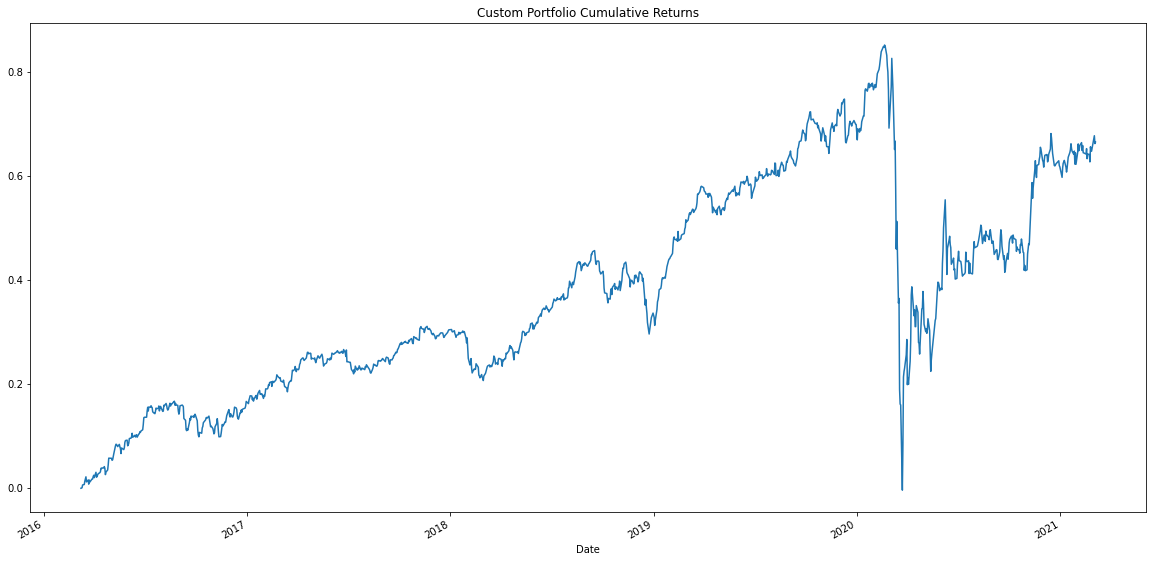

In [131]:
# Here we are calculating our custom portflio cumulative returns and plotting our return over time

combined_cumulative_returns = (1 + custom_returns_weighted).cumprod()-1
combined_cumulative_returns.plot(figsize=(20,10),title="Custom Portfolio Cumulative Returns")

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [132]:
# Joined my custom portfolio returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat([all_returns,custom_returns_weighted],axis="columns", join="inner").copy()
columns = ["SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC.","TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC","Algo 1","Algo 2","S&P TSX","Custom Portfolio"]
all_portfolio_returns.columns = columns
all_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom Portfolio
Date,,,,,,,,
2016-03-08,-0.017508,-0.011011,-0.006303,-0.004351,0.034130,-0.022802,-0.005421,-0.000786
2016-03-09,0.005794,0.009729,0.004657,0.007993,0.001953,0.007020,0.006149,0.000283
2016-03-10,-0.003895,-0.000311,-0.004457,-0.004564,0.006494,-0.008263,-0.001027,0.000729
2016-03-11,0.019038,0.015285,0.010858,0.027820,-0.006676,0.018031,0.010678,0.005327
2016-03-14,-0.005807,-0.003377,0.005121,-0.001029,0.007218,-0.001743,-0.003288,0.000918


<AxesSubplot:xlabel='Date'>

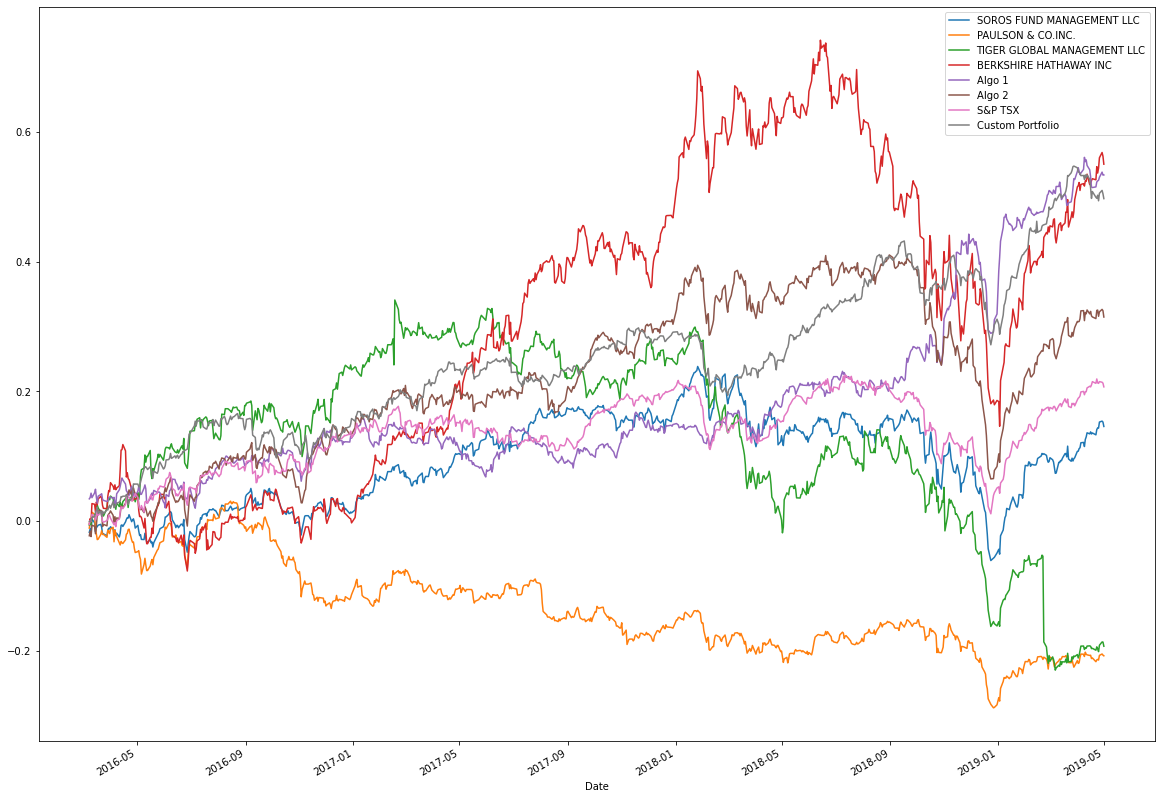

In [133]:
# Calculating again the cumulative returns of each portfolio and plotting it onto a graph

all_portfolio_cumulative_returns = (1 + all_portfolio_returns).cumprod()-1
all_portfolio_cumulative_returns.plot(figsize=(20,15))

In [134]:
#only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
Custom Portfolio               0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [135]:
# Calculated the annualized standard deviation for each portfolio and sorting it in a decending order

annualized_std = all_portfolio_returns.std()*np.sqrt(252)
annualized_std= annualized_std.sort_values(ascending=False)
annualized_std.head(8)

BERKSHIRE HATHAWAY INC         0.190258
TIGER GLOBAL MANAGEMENT LLC    0.178956
Algo 2                         0.122042
SOROS FUND MANAGEMENT LLC      0.118218
PAULSON & CO.INC.              0.113282
Algo 1                         0.107908
S&P TSX                        0.090645
Custom Portfolio               0.084369
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-day Standard Deviaton'}, xlabel='Date'>

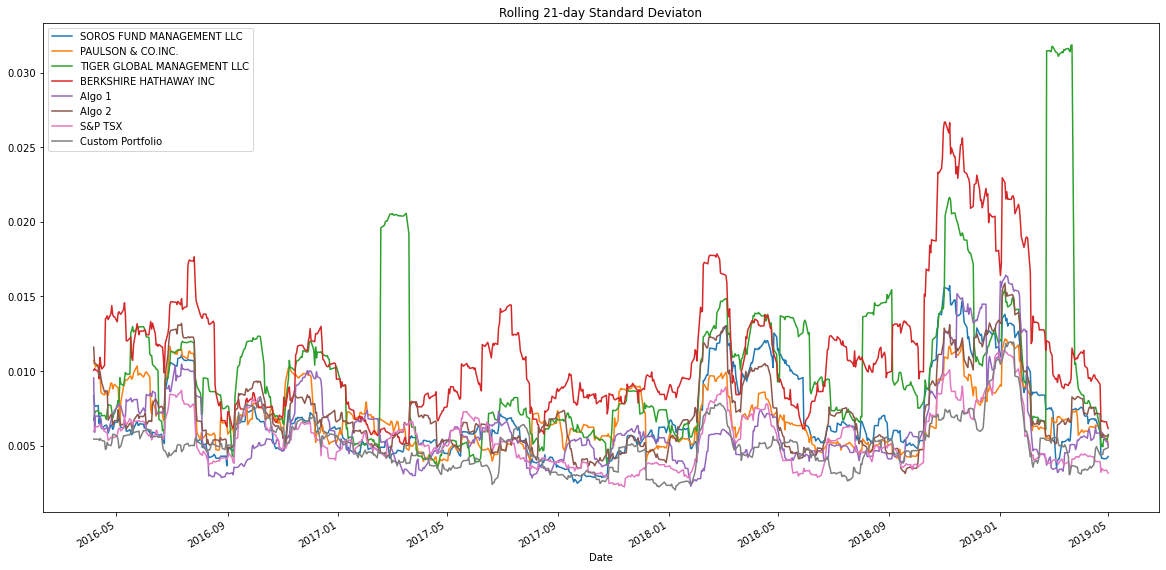

In [136]:
# Calculating the 21-day rolling standard deviation for each portfolio returns

rolling_std_21= all_portfolio_returns.rolling(window=21).std()

# Plotting the rolling standard deviations
rolling_std_21.plot(figsize=(20,10), title="Rolling 21-day Standard Deviaton")

### Calculate and plot the correlation

In [137]:
# Calculating and plotting the correlation between wach portfolio

correlation = all_portfolio_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.658742,0.486822,0.740731,0.225503,0.797789,0.627409,0.324547
PAULSON & CO.INC.,0.658742,1.000000,0.360598,0.511639,0.214888,0.668225,0.479847,0.236764
TIGER GLOBAL MANAGEMENT LLC,0.486822,0.360598,1.000000,0.349405,0.082883,0.431681,0.368523,0.315872
BERKSHIRE HATHAWAY INC,0.740731,0.511639,0.349405,1.000000,0.222496,0.684337,0.552772,0.296508
Algo 1,0.225503,0.214888,0.082883,0.222496,1.000000,0.210849,0.238564,0.107712
Algo 2,0.797789,0.668225,0.431681,0.684337,0.210849,1.000000,0.708139,0.327522
S&P TSX,0.627409,0.479847,0.368523,0.552772,0.238564,0.708139,1.000000,0.430652
Custom Portfolio,0.324547,0.236764,0.315872,0.296508,0.107712,0.327522,0.430652,1.000000


<AxesSubplot:>

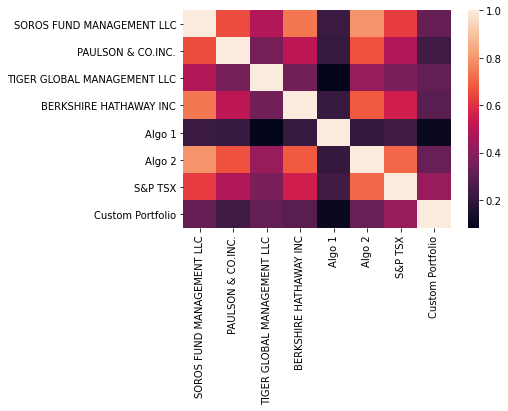

In [138]:
# A heatmap that shows how correlated each portfolio are to each other

sns.heatmap(correlation)


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Beta for Custom Portfolio'}, xlabel='Date', ylabel='Beta'>

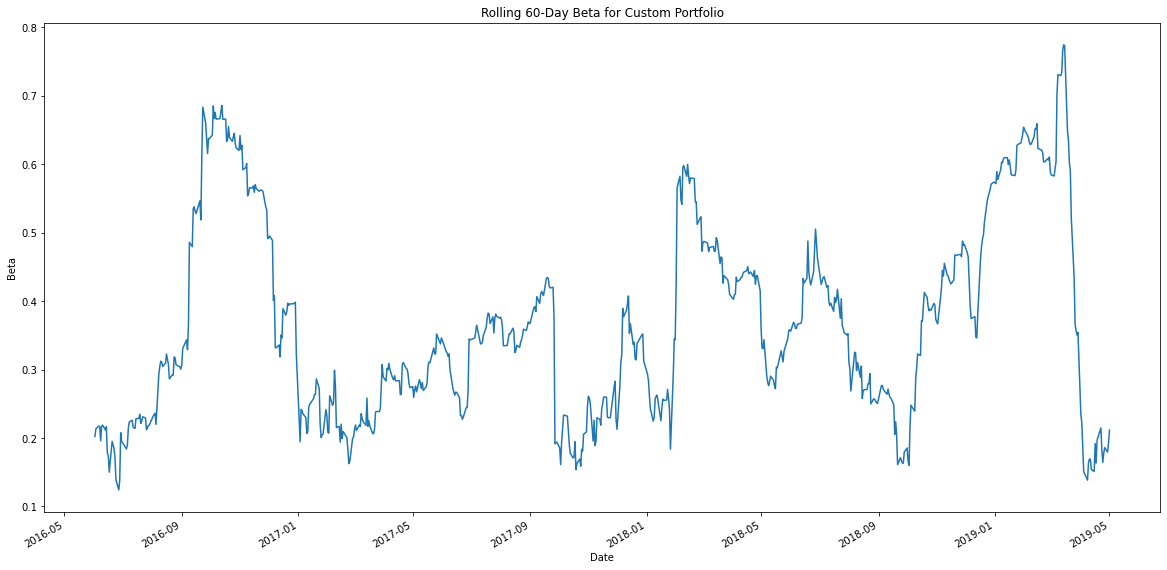

In [139]:
# Calculating and plotting the 60-day rolling Beta for our custom portfolio when compared to the S&P TSX 60

rolling_custom_portfolio_covariance = all_portfolio_returns["Custom Portfolio"].rolling(window=60).cov(all_portfolio_returns["S&P TSX"])
rolling_sptsx_variance = all_portfolio_returns["S&P TSX"].rolling(window=60).var()

rolling_custom_portfolio_beta = rolling_custom_portfolio_covariance / rolling_sptsx_variance

rolling_custom_portfolio_beta.plot(figsize=(20,10), title="Rolling 60-Day Beta for Custom Portfolio",ylabel="Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [140]:
# Calculating the Annualzied Sharpe Ratios for each portfolio
# Assuming a risk free rate of 2%, based on Bank of Canada's longer term benchmark bond yield.
# Source: https://www.bankofcanada.ca/rates/interest-rates/canadian-bonds/

risk_free_rate = 0.02/252

all_sharpe_ratios = (((all_portfolio_returns.mean()- risk_free_rate) * 252)) / (all_portfolio_returns.std() * np.sqrt(252))
all_sharpe_ratios = all_sharpe_ratios.sort_values(ascending=False)
all_sharpe_ratios                                                                


Custom Portfolio               1.354893
Algo 1                         1.152252
BERKSHIRE HATHAWAY INC         0.736810
Algo 2                         0.623197
S&P TSX                        0.496571
SOROS FUND MANAGEMENT LLC      0.262853
TIGER GLOBAL MANAGEMENT LLC   -0.409335
PAULSON & CO.INC.             -0.786524
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

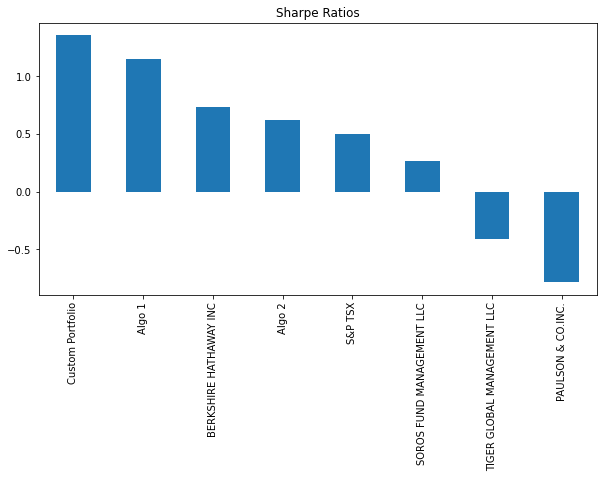

In [141]:
# Visualizing the sharpe ratios as a bar plot
print("")
print("")
all_sharpe_ratios.plot(kind="bar",title="Sharpe Ratios",figsize=(10,5))

### How does your portfolio do?

Write your answer here!

#### Response

Although my custom porfolio did not earn the highest cumulative returns during the period we analyzed, but when looking at the chart above my custom porfolio has the highest sharp ratio when compared to the other portfolios. This tells us that my custom porfolio over the long run earns a reletively higher excess return and being less risky than the other porfolios. The custom porfolio also seems to have a low beta, which means that it is less volatile to market fluctuations when compared to the S&P TSX 60. 